<a href="https://colab.research.google.com/github/prishilevant/ce888/blob/main/lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.dummy import DummyClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data preprocessing:

In [4]:
# Use LabelEncoder to convert the label into numbers.
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [5]:
# Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
df = pd.get_dummies(df)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Column "duration" must be deleted
df = df.drop(['duration'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [8]:
# Check if there are any missing values in the dataset. If there are, drop the rows.

print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


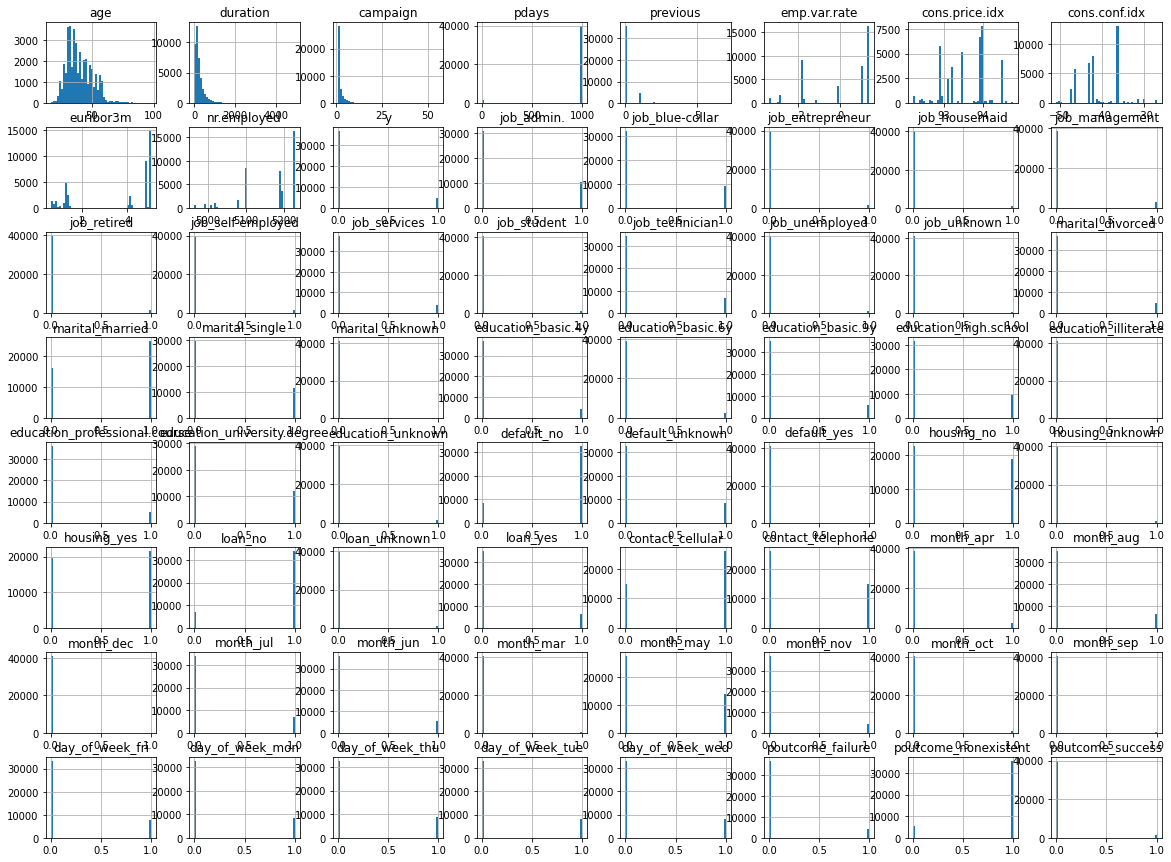

In [9]:
# Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset 

_ = df.hist(bins=50, figsize=(20,15))

In [15]:
# (i.e., divide the number of instances of the minority class by the total length of the dataframe).
print(df['y'].value_counts())
print(f'imbalance', 4640/(41188))

0    36548
1     4640
Name: y, dtype: int64
imbalance 0.11265417111780131


# Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset (i.e., divide the number of instances of the minority class by the total length of the dataframe).


In [9]:
y = df['y']
X = df.drop(['y'],axis=1)
print(X.size)
print(y.size)
print(y.value_counts())

2594844
41188
0    36548
1     4640
Name: y, dtype: int64


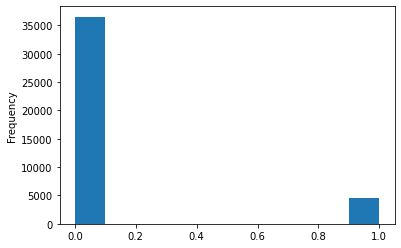

In [ ]:
y.plot.hist()

## Let's model the data:

Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified using the stratify parameter (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

32950 8238 32950 8238


Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options and choose one for cross-validation).

In [12]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [23]:
clf_rf = RandomForestClassifier(n_estimators=100,max_depth=3)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(sorted(sklearn.metrics.SCORERS.keys()))
print("============================================")
print(classification_report(y_test, clf_rf.predict(X_test)))

scores: .0.899181 +/- .0.003567
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_

Compare the cross-validation results of your classifier with that of a dummy classifier.

In [25]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("scores: .%2f" % (dummy_clf.score(X_train, y_train)))
print(classification_report(y_train, dummy_clf.predict(X_train)))

scores: .0.887344
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29238
           1       0.00      0.00      0.00      3712

    accuracy                           0.89     32950
   macro avg       0.44      0.50      0.47     32950
weighted avg       0.79      0.89      0.83     32950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Use GridSearchCV to find a better set of parameters for your random forest.

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,200], 'max_depth':[8,12],
              'random_state': [50, 80], 'min_samples_split':[5, 10], 
              'max_features': ["auto", "sqrt"]}

In [27]:
clf_rf = RandomForestClassifier()
# gsCV = GridSearchCV(estimator=clf_rf, param_grid=parameters, cv= 10)
# gsCV.fit(X_train, y_train)
# GridSearchCV(cv=10, estimator=RandomForestClassifier(),
#              param_grid={'max_depth': [8, 12], 'max_features': ['auto', 'sqrt'],
#                          'min_samples_split': [5, 10],
#                          'n_estimators': [100, 200], 'random_state': [50, 80]})

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 12], 'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200], 'random_state': [50, 80]})

Commenting this to avoid time spent training

In [29]:
print(gsCV.best_params_)
# {'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 50}

{'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 50}


Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV (on your training set)

In [30]:
best_rfl = RandomForestClassifier(max_depth= 12, max_features= 'auto',
                                  min_samples_split =  10, n_estimators= 200, random_state= 50)
best_rfl.fit(X_train, y_train)
scores = cross_val_score(best_rfl, X_train, y_train, cv=10)
print(classification_report(y_test, best_rfl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.75      0.35      0.48       928

    accuracy                           0.91      8238
   macro avg       0.83      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [11]:
from sklearn.metrics import confusion_matrix, classification_report

## Quiz

Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Perform 10-fold cross-validation using as a classifier a random forest with 200 estimators and a maximum depth of 8. Report the average F1 score with two numbers after the floating point (e.g., 0.56)

In [25]:
y = df[['y']]
X = df.drop(['y'],axis=1)
print(X.shape, y.shape)

(41188, 62) (41188, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
print(len(X_train),len(X_test),len(y_train),len(y_test))
# print(X_train, y_train)
# print(X_train.shape, y_train.shape)
clf_rf = RandomForestClassifier(n_estimators = 200,max_depth= 8)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print(f'f1 score', scores.mean())

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

f1 score 0.30774487357654545


Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Report the generalisation error of a random forest classifier with 100 estimators and a maximum depth of 12. Report the F1 score with two numbers after the floating point (e.g., 0.56).

Make sure you set the random_state parameter of RandomForestClassifier to 60.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
print(len(X_train),len(X_test),len(y_train),len(y_test))
# print(X_train, y_train)
# print(X_train.shape, y_train.shape)
clf_rf = RandomForestClassifier(n_estimators = 100,max_depth= 12,random_state = 60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print(f'f1 score', scores.mean())

from sklearn.metrics import f1_score

y_pred = clf_rf.predict(X_test)
f1_score(y_test, y_pred)

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

f1 score 0.3583344255326422


0.3630907726931733

Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Train a random forest classifier with 100 estimators and a maximum depth of 12, setting the random_state parameter to 60.

What are the top 3 features?

In [30]:
clf_rf = RandomForestClassifier(n_estimators = 100,max_depth= 12,random_state = 60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print(f'f1 score', scores.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

f1 score 0.3583344255326422


[ 7  8  2 61  4  0  6  5  3  1 59 42 60 49 52 43 55 50 36 38 31 44 23 22
 56 57 28 54 39  9 41 58 14 10 27 18 30 17 33 21 25 32 53 13 48 34 26 16
 15 45 19 12 51 40 47 37 20 11 46 24 29 35]
Feature ranking:
1. euribor3m (0.149982)
2. nr.employed (0.109221)
3. pdays (0.070889)
4. poutcome_success (0.066213)
5. emp.var.rate (0.065898)
6. age (0.060281)
7. cons.conf.idx (0.057114)
8. cons.price.idx (0.049094)
9. previous (0.029169)
10. campaign (0.028006)
11. poutcome_failure (0.014227)
12. contact_cellular (0.014179)
13. poutcome_nonexistent (0.013993)
14. month_mar (0.012719)
15. month_oct (0.012427)
16. contact_telephone (0.011502)
17. day_of_week_mon (0.010744)
18. month_may (0.010209)
19. housing_no (0.008579)
20. housing_yes (0.008570)
21. education_university.degree (0.008419)
22. month_apr (0.008134)
23. marital_single (0.007953)
24. marital_married (0.007830)
25. day_of_week_thu (0.007584)
26. day_of_week_tue (0.007375)
27. education_high.school (0.007308)
28. day_of_week_fri (0.

(0.0, 0.297070597450909)

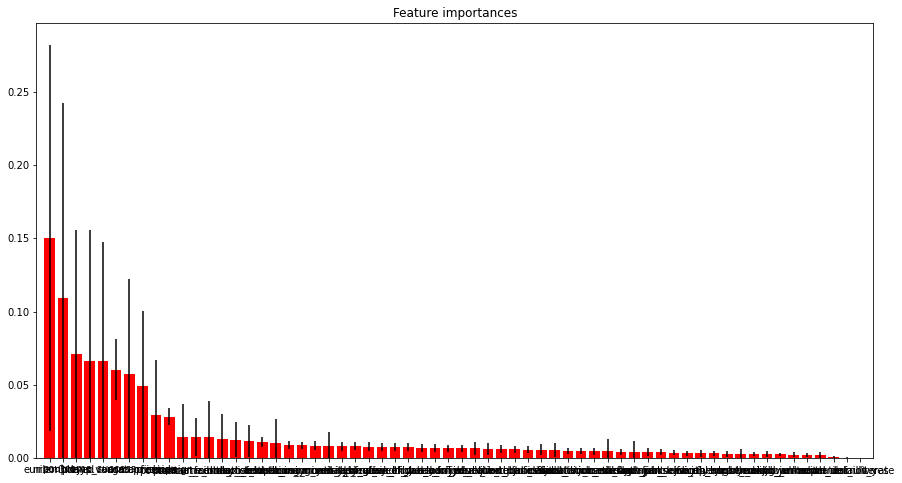

In [33]:
features = list(X.columns)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [35]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(clf_rf, outp, -1)  # where clf is your classifier
outp.close()
